<a href="https://www.kaggle.com/code/averma111/sparkml-pss3e18?scriptVersionId=135530542" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [19]:
%%capture
pip install pyspark findspark

In [20]:
from pyspark.sql import SparkSession
import pandas as pd


In [21]:
spark = SparkSession.builder.appName('Enzyme-Classification').getOrCreate()
df = spark.read.csv('/kaggle/input/playground-series-s3e18/train.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- BertzCT: double (nullable = true)
 |-- Chi1: double (nullable = true)
 |-- Chi1n: double (nullable = true)
 |-- Chi1v: double (nullable = true)
 |-- Chi2n: double (nullable = true)
 |-- Chi2v: double (nullable = true)
 |-- Chi3v: double (nullable = true)
 |-- Chi4n: double (nullable = true)
 |-- EState_VSA1: double (nullable = true)
 |-- EState_VSA2: double (nullable = true)
 |-- ExactMolWt: double (nullable = true)
 |-- FpDensityMorgan1: double (nullable = true)
 |-- FpDensityMorgan2: double (nullable = true)
 |-- FpDensityMorgan3: double (nullable = true)
 |-- HallKierAlpha: double (nullable = true)
 |-- HeavyAtomMolWt: double (nullable = true)
 |-- Kappa3: double (nullable = true)
 |-- MaxAbsEStateIndex: double (nullable = true)
 |-- MinEStateIndex: double (nullable = true)
 |-- NumHeteroatoms: integer (nullable = true)
 |-- PEOE_VSA10: double (nullable = true)
 |-- PEOE_VSA14: double (nullable = true)
 |-- PEOE_VSA6: double (nullable = t

In [22]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
id,0.000000,1.000000,2.000000,3.000000,4.000000
BertzCT,323.390782,273.723798,521.643822,567.431166,112.770735
Chi1,9.879918,7.259037,10.911303,12.453343,4.414719
Chi1n,5.875576,4.441467,8.527859,7.089119,2.866236
Chi1v,5.875576,5.834958,11.050864,12.833709,2.866236
Chi2n,4.304757,3.285046,6.665291,6.478023,1.875634
Chi2v,4.304757,4.485235,9.519706,10.978151,1.875634
Chi3v,2.754513,2.201375,5.824822,7.914542,1.036450
Chi4n,1.749203,1.289775,1.770579,3.067181,0.727664
EState_VSA1,0.000000,45.135471,15.645394,95.639554,17.980451


In [23]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'double']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
BertzCT,14838,515.1536037572193,542.4563703781199,0.0,4069.95978
Chi1,14838,9.13518888140117,6.819988988354918,0.0,69.55116728
Chi1n,14838,5.85430732696388,4.647063814869596,0.0,50.17458776
Chi1v,14838,6.738497104166811,5.866443996299089,0.0,53.43195375
Chi2n,14838,4.432569681181512,3.7605162837345865,0.0,32.19536806
Chi2v,14838,5.253221209828411,4.9250648060111395,0.0,34.57931288
Chi3v,14838,3.4187494916926093,3.4362083226088607,0.0,22.88083629
Chi4n,14838,1.773472409867397,1.8658979320252407,0.0,16.0728097
EState_VSA1,14838,29.202823184349175,31.728679499402183,0.0,363.7059541


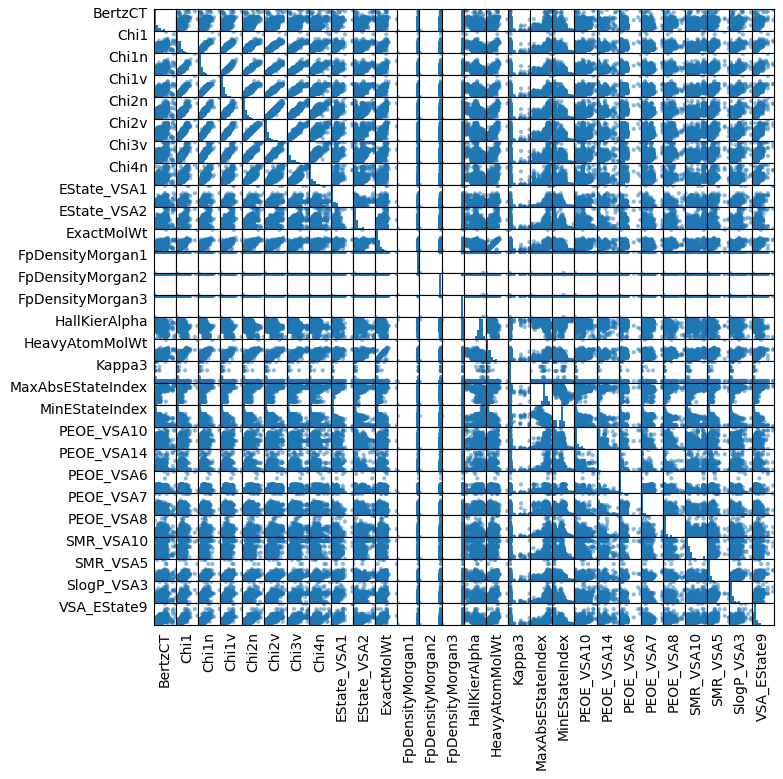

In [24]:
from pandas.plotting import scatter_matrix
numeric_data = df.select(numeric_features).toPandas()
axs = scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [25]:
df.columns

['id',
 'BertzCT',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3v',
 'Chi4n',
 'EState_VSA1',
 'EState_VSA2',
 'ExactMolWt',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'HallKierAlpha',
 'HeavyAtomMolWt',
 'Kappa3',
 'MaxAbsEStateIndex',
 'MinEStateIndex',
 'NumHeteroatoms',
 'PEOE_VSA10',
 'PEOE_VSA14',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'SMR_VSA10',
 'SMR_VSA5',
 'SlogP_VSA3',
 'VSA_EState9',
 'fr_COO',
 'fr_COO2',
 'EC1',
 'EC2',
 'EC3',
 'EC4',
 'EC5',
 'EC6']

In [26]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
categoricalColumns = ['fr_COO', 'fr_COO2', 'NumHeteroatoms']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'EC1', outputCol = 'EC1_label')
stages += [label_stringIdx]



In [27]:
numericCols = ['BertzCT',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3v',
 'Chi4n',
 'EState_VSA1',
 'EState_VSA2',
 'ExactMolWt',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'HallKierAlpha',
 'HeavyAtomMolWt',
 'Kappa3',
 'MaxAbsEStateIndex',
 'MinEStateIndex',
 'PEOE_VSA10',
 'PEOE_VSA14',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'SMR_VSA10',
 'SMR_VSA5',
 'SlogP_VSA3',
 'VSA_EState9',
 'fr_COO',
 'fr_COO2',]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="EC1_features")
stages += [assembler]

In [28]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
selectedCols = ['EC1_label', 'EC1_features']
df = df.select(selectedCols)
df.printSchema()

root
 |-- EC1_label: double (nullable = false)
 |-- EC1_features: vector (nullable = true)



In [29]:
train, val = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(val.count()))

Training Dataset Count: 10412


Test Dataset Count: 4426


In [30]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'EC1_features', labelCol = 'EC1_label', maxIter=10)
lrModel = lr.fit(train)

23/07/02 18:42:01 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


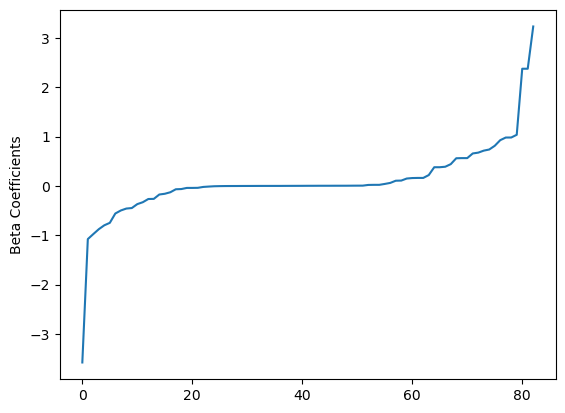

In [31]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

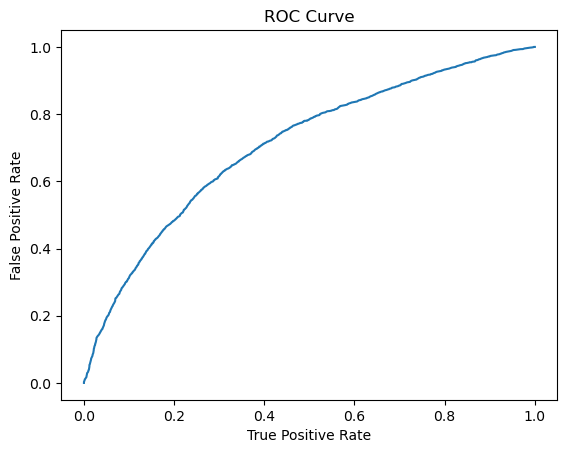

Training set areaUnderROC: 0.7083103522442407


In [32]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

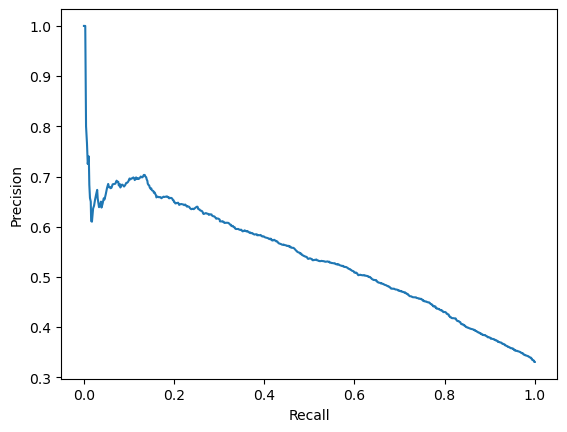

In [33]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
predictions = lrModel.transform(test)
predictions.select('age', 'job', 'label', 'rawPrediction', 'prediction', 'probability').show(10)